In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [27]:
decayA, decayB = 0.5,0.3

In [28]:
def System(r,t,decayA,decayB):
    NA = r[0]
    NB = r[1]
    N = r[2]

    dNAdt = -decayA*NA
    dNBdt = decayA*NA - decayB*NB
    dNdt = decayB*NB
    
    return np.array([dNAdt, dNBdt, dNdt])

In [29]:
t = np.linspace(0,10,50)
r0 =  np.array([500, 0, 0])

In [30]:
sol = odeint(System, r0, t, args=(0.5,0.3))
NA = sol[:,0]
NB = sol[:,1]
NC = sol[:,2]

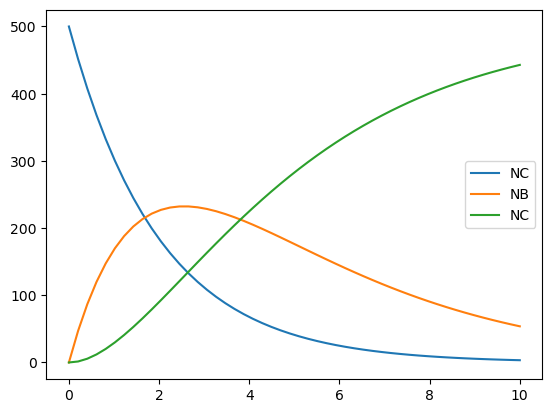

In [31]:
plt.plot(t,NA,label="NC")
plt.plot(t,NB,label="NB")
plt.plot(t,NC,label="NC")
plt.legend()

In [32]:
def Increment(f,r,t,h,decayA,decayB):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t,decayA,decayB)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h,decayA,decayB)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h,decayA,decayB)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h,decayA,decayB)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [72]:
def Adaptativo(f,r0,t,e=1e-4):
    #Calcule $h$, $t_{0}$, $t_{f}$.
    
    h = t[2] - t[1]
    
    #Defina los vectores de tiempo y de solución del sistema.
  
    Vector = r0
    
    tf = t[-1]
    t = t[0]
      
    Time = np.array([t])
    
    r=r0
    
    while t < tf:
    # Avance h desde el punto actual
        r1 = Increment(f,r,t,h,decayA,decayB)
    # Avance h desde el siguiente punto
        r2 = Increment(f,r1,t+h,h,decayA,decayB)
        
    # Avance 2h desde el punto actual
        rt = Increment(f,r,t,2*h,decayA,decayB)
        
    # El error es comparar los avances
    #->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )
        
    # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2*h
            r = rt
            # Llene vectores

    # Si el error es muy grande, cambie el paso
    # Según Fehlberg
 
        q = 0.85*(e/error)**(0.25)
        h = h*q
            
        Time = np.append(Time,t)
        Vector = np.vstack((Vector,r))
        
    
            
    return Time, Vector

In [73]:
sol2 = Adaptativo(System,r0,t)

In [74]:
t1 = sol2[0]
Ns = sol2[1]
len(t1),len(Ns)

(39, 39)

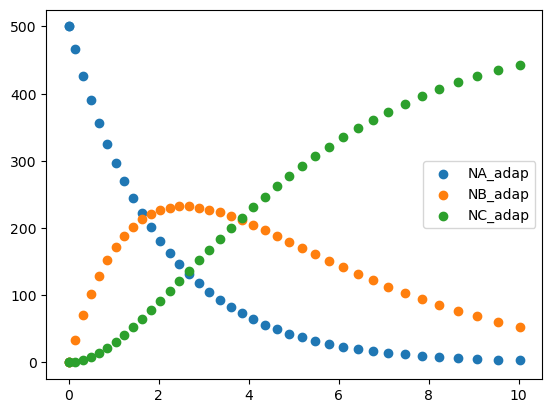

In [75]:
plt.scatter(t1,Ns[:,0],label="NA_adap")
plt.scatter(t1,Ns[:,1],label="NB_adap")
plt.scatter(t1,Ns[:,2],label="NC_adap")
plt.legend()

e) Comparación con ODEINT

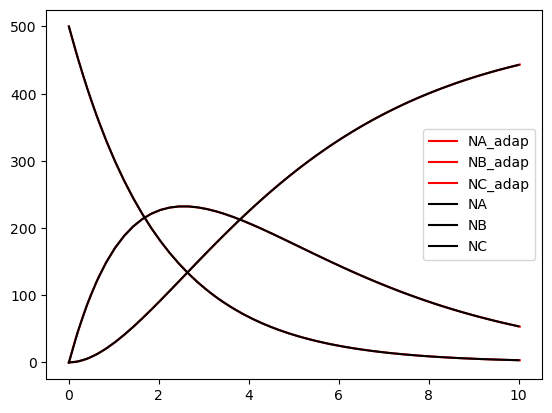

In [76]:
plt.plot(t1,Ns[:,0],label="NA_adap",color="red")
plt.plot(t1,Ns[:,1],label="NB_adap",color="red")
plt.plot(t1,Ns[:,2],label="NC_adap",color="red")
plt.plot(t,NA,label="NA",color="k")
plt.plot(t,NB,label="NB",color="k")
plt.plot(t,NC,label="NC",color="k")
plt.legend()

f) ¿En que momento, la cantidad de partıculas B es máxima?


In [77]:
t_max = 0
i_max = 0

for i in range(len(Ns[:,1])):
    if Ns[:,1][i] == np.max(Ns[:,1]):
        t_max = t1[i]
        i_max = i

In [78]:
t_max

2.4520362395696504

g) ¿En ese momento donde B es m´aximia, cu´antas part´ıculas B y C hay?

In [79]:
NA_ = Ns[:,0][i_max]
NB_ = Ns[:,1][i_max]
NC_ = Ns[:,2][i_max]

In [80]:
NA_ , NB_ , NC_

(146.7295259199198, 232.1920182235683, 121.0784558565119)